## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Kaparinos Nikos"
AEM = "9245"

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [2]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import unittest

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library and split the dataset into train and test set using the appropriate function. Use 30% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [3]:
# BEGIN CODE HERE
X,y = load_breast_cancer(return_X_y=True,as_frame=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=RANDOM_VARIABLE,test_size=0.3)
#END CODE HERE

In [4]:
print("Size of train set:{}".format(len(y_train)))
print("Size of test set:{}".format(len(y_test)))
print("Unique classes:{}".format(len(set(y_test))))

Size of train set:398
Size of test set:171
Unique classes:2


**Expected output**:  
Size of train set:398  
Size of test set:171  
Unique classes:2  

**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other

In [5]:
# BEGIN CODE HERE
classifier_gini = DecisionTreeClassifier(random_state=RANDOM_VARIABLE).fit(X_train,y_train)
classifier_igain = DecisionTreeClassifier(random_state=RANDOM_VARIABLE,criterion='entropy').fit(X_train,y_train)

prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

f_measure_gini = f1_score(y_test, prediction_gini)
f_measure_igain = f1_score(y_test, prediction_igain)

#END CODE HERE

In [6]:
print("F-Measure Gini:{}".format(f_measure_gini))
print("F-Measure Information Gain:{}".format(f_measure_igain))

F-Measure Gini:0.9528301886792453
F-Measure Information Gain:0.9724770642201834


**Expected output**:  
F-Measure Gini:0.9528301886792453  
F-Measure Information Gain:0.9724770642201834  


**1.3** Find the maximum depth reached by the tree that used the Gini impurity. Train multiple classifier by modifying the max_depth within the range from 1 to maximum depth and save the f1 scores to lists.  

In [7]:
# BEGIN CODE HERE
#depth = classifier_gini.tree_.max_depth
depth = 7
print(depth)

fscores_train = []
fscores_test = []
for d in range(1,depth+1):
    classifier_gini = DecisionTreeClassifier(random_state=RANDOM_VARIABLE,max_depth=d).fit(X_train,y_train)
    y_pred = classifier_gini.predict(X_train)
    f_train = f1_score(y_train, y_pred)
    fscores_train.append(f_train)
    
    y_pred = classifier_gini.predict(X_test)
    f_test = f1_score(y_test, y_pred)
    fscores_test.append(f_test)

#END CODE HERE

7


In [8]:
print("Fscores Train:{}".format(fscores_train))
print("Fscores Test:{}".format(fscores_test))


Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]


**Expected output**:  
Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]  
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]



**1.4** Compare the results from the train set with the results from the test set. What do you notice? Explain your findings. How are you going to choose the max_depth of your model?

As expected, the testing f1 score is lower than the training f1 score. Also, the training f1 score increases when the maximum depth increases, because the model fits better to the training data. The optimal model is the one with the higher testing f1 score.

## 2.0 Pipelines ##

**2.1** In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

In [9]:
# BEGIN CODE HERE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.base import TransformerMixin,BaseEstimator
import time

# Imputers return an nd.array. An imputer passed through this class returnes a dataframe.
class imputerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self,imp=SimpleImputer()):
        self.imp = imp
#         super().__init__()

    def fit(self, X, y=None):
        self.imp.fit(X)
        return self

    def transform(self, X, y=None):
        result = pd.DataFrame(data=self.imp.transform(X),index=X.index,columns=X.columns)
        return result

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
start = time.perf_counter()
acc_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score)

# Read data
data_train = pd.read_csv("income.csv")
data_test = pd.read_csv("income_test.csv")

# Convert target variable to 0 and 1
data_train["income"] = data_train["income"].map({"<=50K": 0, ">50K": 1})
data_test["income"] = data_test["income"].map({"<=50K": 0, ">50K": 1})

# Outlier removal
# print(data_train.describe(percentiles=[0.001,0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.975, 0.99, 0.999, 0.9999]))
# data_train = data_train[data_train["capital-loss"] < np.percentile(data_train["capital-loss"], 99.99)]

# Create X and y
y_train = data_train['income'].values
X_train = data_train.drop(["income"], axis=1)
y_test = data_test['income'].values
X_test = data_test.drop(["income"], axis=1)

# Transformers
imp1 = SimpleImputer(strategy='constant', fill_value="NaN")
le = preprocessing.LabelEncoder()
oneEnc = preprocessing.OneHotEncoder()
ordEnc = preprocessing.OrdinalEncoder()

# Encoding
objectColumnList = []
for i in X_train.columns.values:
    if X_train[i].dtype == object:
        objectColumnList.append(i)
        columnHasMissingValue = X_train[i].isnull().values.any()

        # Imputation
        X_train[i] = imp1.fit_transform(X_train[[i]])
        X_test[i] = imp1.transform(X_test[[i]])

        # Encoding
        X_train[i] = le.fit_transform(X_train[i])
        X_test[i] = le.transform(X_test[i])
        if columnHasMissingValue:
            # If column had a missing value, it is now encoded.
            # Remove the encoded value from the column.
            nan = np.array(['NaN'])
            X_train[i] = X_train[i].replace(int(le.transform(nan)[0]), np.nan)
#           X_test[i] = X_test[i].replace(le.transform(nan),np.nan)

# One hot encoder
pipeOneHot = ColumnTransformer([
    ("one_enc", oneEnc, objectColumnList) #make_column_selector(dtype_include=object)) #
], remainder='passthrough')

# preprocessing.MinMaxScaler()
# preprocessing.StandardScaler(with_mean=False)

# Pipeline
# imputerWrapper is used because pipeOneHot can only be used on a dataframe.
pipe = Pipeline([
    ('imputer', imputerWrapper()),
#     ('one_hot', pipeOneHot),
    ('scale', preprocessing.StandardScaler(with_mean=False)),
    ('clf', DecisionTreeClassifier(random_state=RANDOM_VARIABLE))])
print(pipe)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# imputer__strategy=['mean', 'median', 'most_frequent','constant'],
# Grid search
params = dict(
    clf__max_depth=[1, 2, 3, 4, 5, 6, 7, 8], clf__criterion=['gini', 'entropy'], clf__min_samples_leaf=[1, 2, 3])
params = {}
scoring = {'acc': acc_scorer, 'f1': f1_scorer}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_VARIABLE)

grid = GridSearchCV(pipe, param_grid=params, cv=cv, n_jobs=4, verbose=1, scoring='accuracy',
                    return_train_score=False, refit=True)
grid.fit(X_train, y_train)

# Evaluate best model
y_pred = grid.predict(X_test)
fScore = f1_score(y_test, y_pred)
accScore = accuracy_score(y_test, y_pred)

# Print results
results = pd.DataFrame(grid.cv_results_)
print(results)
print(f"Accuracy score = {accScore:.4f}")
print(f"F1 score = {fScore:.4f}")

# Execution Time
end = time.perf_counter()
print(f"\nExecution time = {end - start:.2f} second(s)")
# END CODE HERE

Pipeline(steps=[('imputer', imputerWrapper()),
                ('scale', StandardScaler(with_mean=False)),
                ('clf', DecisionTreeClassifier(random_state=42))])
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.7s finished


   mean_fit_time  std_fit_time  mean_score_time  std_score_time params  \
0       0.152488      0.004014         0.004316        0.001184     {}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.821922           0.813882           0.815725            0.81726   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0           0.808968           0.806818           0.818182           0.803133   

   split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0           0.811732           0.813882          0.81315        0.005355   

   rank_test_score  
0                1  
Accuracy score = 0.8082
F1 score = 0.6129

Execution time = 2.42 second(s)


**2.2** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

- Many imputation methods were used. Since the number of missing values is small, the imputation method did not affect the models\` performance much. Simple mean imputation was optimal. The other imputation methods that were used are: median, most frequent, fill zero, kNN and iterative.
- Categorical variables needed to be encoded, since scikit learn decision tree models only handle numerical data. Ordinal and one hot encoding were used. One hot encoding resulted in a very small increase in performance.
- Simple outlier removal was experimented with. Each feature\`s max and min values were compared to the 0.1 and 99.9 percentile respectively. Only in the feature "capital-loss", the max value differed significantly from the 99.9 percentile. Removing those samples slightly improved performance.
- 10-fold cross validation was used to tune the hyper parameters and the model was evaluated in the test set.
- To further improve the model\`s accuracy, ensemble methods could be worth experimenting with.

## 3.0 Common Issues ## 

**3.0** Run the following code to define a DecisionTreeModel and load the **income** dataset only with the numerical variables. Then, answer the following questions. 

In [10]:
# Load Data
columns = ['age','fnlwgt','education_num','hours-per-week',"capital-loss","capital-gain","income"]
data = pd.read_csv('income.csv',usecols=columns)
data_test = pd.read_csv('income_test.csv',usecols=columns)
# Convert target variable to 0 and 1
data["income"] = data["income"].map({ "<=50K": 0, ">50K": 1 })
data_test["income"] = data_test["income"].map({ "<=50K": 0, ">50K": 1 })
# Create X and y
X_train = data.drop(["income"],axis=1)
y_train = data['income'].values
X_test = data_test.drop(["income"],axis=1)
y_test = data_test['income'].values
# Classifier
classifier = DecisionTreeClassifier(min_samples_leaf=4)

**3.1** Draw a learning curve for the classifer for the train and test set loaded above.

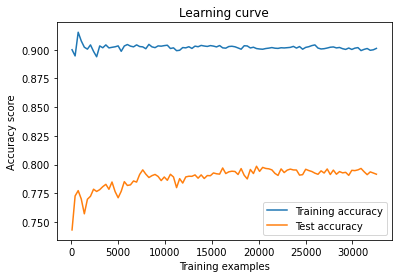

In [11]:
# BEGIN CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns
# classifier = DecisionTreeClassifier(min_samples_leaf=4)

def learning_curve(classifier,X_train, y_train, X_test, y_test): #Use any parameters you need
    numSamples = np.linspace(100,X_train.shape[0],100,dtype=int)
    training_acc = []
    test_acc = []
    for n in numSamples:
        # Data set
        X_train_new = X_train[:n]
        y_train_new = y_train[:n]
        
        # Training
        classifier.fit(X_train_new, y_train_new)
        
        # Predictions
        y_pred_train = classifier.predict(X_train_new)
        y_pred_test = classifier.predict(X_test)
        
        # Append training and test accuracy
        training_acc.append(accuracy_score(y_train_new, y_pred_train))
        test_acc.append(accuracy_score(y_test, y_pred_test))
    
    # Plot learning curve
    sns.lineplot(x=numSamples,y=training_acc,label="Training accuracy")
    sns.lineplot(x=numSamples,y=test_acc, label="Test accuracy")
    plt.title('Learning curve')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy score')

# Run learning curve
learning_curve(classifier,X_train, y_train, X_test, y_test)
#END CODE HERE

**3.2** Do you notice any problems with the classifier? If so, what can you do to change this.

Yes, it is obvious that the classifier is overfit. Although the training set increases in size, the test accuracy does not. Also, the training accuracy is substantially higher than the test accuracy.
This problem can be solved by making the model not fit as much to the data by tuning the hyper parameters. By defining a maximum depth or by increasing the minimum leaf samples, we can make the model not fit as much to the data

**3.3** Implement your solution using the cells below. Report your results and the process you followed. 

Scores with min_samples_leaf=4:
Accuracy score = 0.7907
F1 score = 0.5317

Tree max depth = 39

Scores with min_samples_leaf=10:
Accuracy score = 0.8123
F1 score = 0.5441



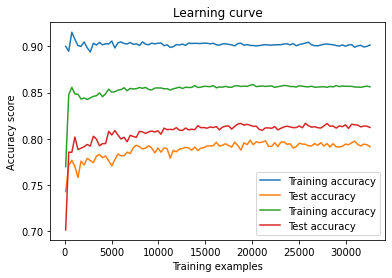

Scores with max_depth=10:
Accuracy score = 0.8236
F1 score = 0.5530



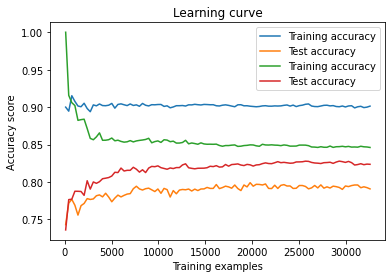

Scores with min_samples_leaf=4,max_depth=10:
Accuracy score = 0.8254
F1 score = 0.5564



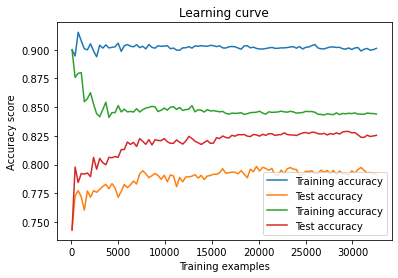

In [23]:
# BEGIN CODE HERE
# As mentioned above, we should make the model not fit as much to the data. This can be done by
# tuning the hyper parameters min_samples_leaf and max depth. First, we will try tuning one of the them
# and next we will tune both.
classifier = DecisionTreeClassifier(min_samples_leaf=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
starting_acc_score = accuracy_score(y_test, y_pred)
starting_f1_score = f1_score(y_test, y_pred)
print("Scores with min_samples_leaf=4:")
print(f"Accuracy score = {starting_acc_score:.4f}")
print(f"F1 score = {starting_f1_score:.4f}\n")

print(f"Tree max depth = {classifier.tree_.max_depth}\n")
plt.show()

# Figure 1: changing the value for min_samples_leaf
# The results,although better, are not not much different than before.
plt.figure(num=1)
classifier = DecisionTreeClassifier(min_samples_leaf=4)
learning_curve(classifier,X_train, y_train, X_test, y_test)
classifier = DecisionTreeClassifier(min_samples_leaf=15)
learning_curve(classifier,X_train, y_train, X_test, y_test)
y_pred = classifier.predict(X_test)
acc_result = accuracy_score(y_test, y_pred)
f1_result = f1_score(y_test, y_pred)
print("Scores with min_samples_leaf=10:")
print(f"Accuracy score = {acc_result:.4f}")
print(f"F1 score = {f1_result:.4f}\n")
plt.show()


# # Figure 2: changing the value for max_depth
# # Changing the value for max depth made a big difference. The model does
# # not overfit to the data and the performance is better than before.
plt.figure(num=2)
classifier = DecisionTreeClassifier(min_samples_leaf=4)
learning_curve(classifier,X_train, y_train, X_test, y_test)
classifier = DecisionTreeClassifier(max_depth=10)
learning_curve(classifier,X_train, y_train, X_test, y_test)
y_pred = classifier.predict(X_test)
acc_result = accuracy_score(y_test, y_pred)
f1_result = f1_score(y_test, y_pred)
print("Scores with max_depth=10:")
print(f"Accuracy score = {acc_result:.4f}")
print(f"F1 score = {f1_result:.4f}\n")
plt.show()

# # Figure 2: changing the value for max_depth and min_samples_leaf
# Changing the values for both these hyper parametes is slightly better than only
# chaning the value for max depth.
plt.figure(num=3)
classifier = DecisionTreeClassifier(min_samples_leaf=4)
learning_curve(classifier,X_train, y_train, X_test, y_test)
classifier = DecisionTreeClassifier(min_samples_leaf=4,max_depth=10)
learning_curve(classifier,X_train, y_train, X_test, y_test)
y_pred = classifier.predict(X_test)
acc_result = accuracy_score(y_test, y_pred)
f1_result = f1_score(y_test, y_pred)
print("Scores with min_samples_leaf=4,max_depth=10:")
print(f"Accuracy score = {acc_result:.4f}")
print(f"F1 score = {f1_result:.4f}\n")
plt.show()

final_acc_score = acc_result
final_f1_score = f1_result

#END CODE HERE

YOUR ANSWER HERE